<a href="https://colab.research.google.com/github/MarkLee7925/Gas-Turbine-Emissions/blob/main/GasTurbineEmissions_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gas Turbine Emissions - K-Means Clustering

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Load and Summarize Data

In [2]:
# Load dataframe (df)
df = pd.read_csv('gt_2011-15.csv')
df = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX', 'TEY']]
X = df.iloc[:, :].values

print(X.shape)

(36733, 11)


In [3]:
df

AT      AP      AH    AFDP  ...     CDP        CO      NOX     TEY
0      4.5878  1018.7  83.675  3.5758  ...  11.898   0.32663   81.952  134.67
1      4.2932  1018.3  84.235  3.5709  ...  11.892   0.44784   82.377  134.67
2      3.9045  1018.4  84.858  3.5828  ...  12.042   0.45144   83.776  135.10
3      3.7436  1018.3  85.434  3.5808  ...  11.990   0.23107   82.505  135.03
4      3.7516  1017.8  85.182  3.5781  ...  11.910   0.26747   82.028  134.67
...       ...     ...     ...     ...  ...     ...       ...      ...     ...
36728  3.6268  1028.5  93.200  3.1661  ...  10.411  10.99300   89.172  109.08
36729  4.1674  1028.6  94.036  3.1923  ...  10.344  11.14400   88.849  108.79
36730  5.4820  1028.5  95.219  3.3128  ...  10.462  11.41400   96.147  107.81
36731  5.8837  1028.7  94.200  3.9831  ...  11.771   3.31340   64.738  131.41
36732  6.0392  1028.8  94.547  3.8752  ...  11.462  11.98100  109.240  125.41

[36733 rows x 11 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   CDP     36733 non-null  float64
 8   CO      36733 non-null  float64
 9   NOX     36733 non-null  float64
 10  TEY     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [5]:
df.describe()

AT            AP  ...           NOX           TEY
count  36733.000000  36733.000000  ...  36733.000000  36733.000000
mean      17.712726   1013.070165  ...     65.293067    133.506404
std        7.447451      6.463346  ...     11.678357     15.618634
min       -6.234800    985.850000  ...     25.905000    100.020000
25%       11.781000   1008.800000  ...     57.162000    124.450000
50%       17.801000   1012.600000  ...     63.849000    133.730000
75%       23.665000   1017.000000  ...     71.548000    144.080000
max       37.103000   1036.600000  ...    119.910000    179.500000

[8 rows x 11 columns]

In [6]:
# Check for missing values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

## 3. Visualize Data

#### Ambient Temperature Distribution

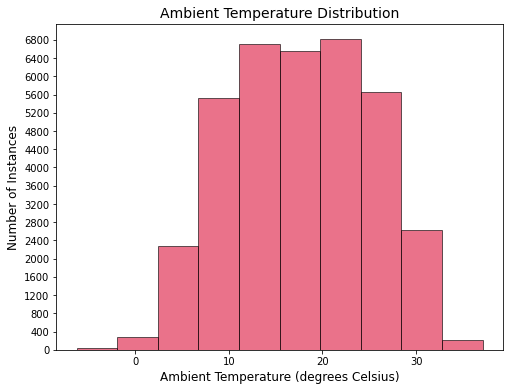

In [7]:
plt.figure(figsize=(8, 6))
plt.yticks(np.arange(0, 7000, 400))
plt.hist(x=df['AT'], alpha=0.6, color='crimson', edgecolor='black')
plt.xlabel('Ambient Temperature (degrees Celsius)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Ambient Temperature Distribution', fontsize=14)
plt.show()

#### Ambient Pressure Distribution

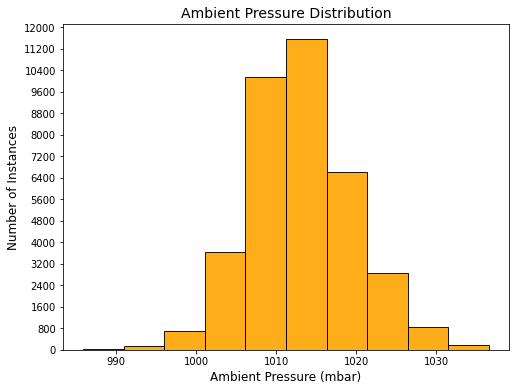

In [8]:
plt.figure(figsize=(8, 6))
plt.yticks(np.arange(0, 12800, 800))
plt.hist(x=df['AP'], alpha=0.9, color='orange', edgecolor='black')
plt.xlabel('Ambient Pressure (mbar)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Ambient Pressure Distribution', fontsize=14)
plt.show()

#### Ambient Temperature vs. Ambient Pressure

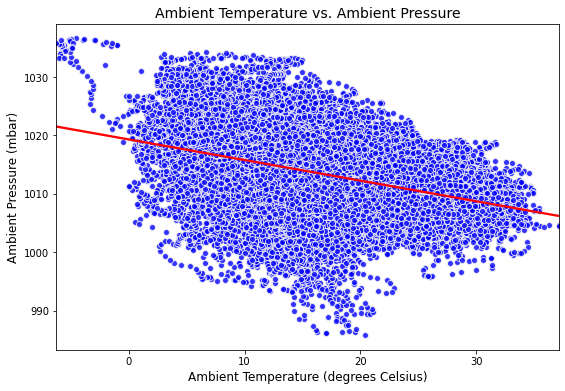

In [9]:
plt.figure(figsize=(9, 6))
plt.xticks(np.arange(-10, 50, 10))
plt.yticks(np.arange(950, 1050, 10))
# plt.scatter(x=df['AT'], y=df['AP'], alpha=0.4, color='blue', edgecolor='white')
sns.regplot(x=df['AT'], y=df['AP'], order=1, 
            scatter_kws={"color": "blue", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
plt.xlabel('Ambient Temperature (degrees Celsius)', fontsize=12)
plt.ylabel('Ambient Pressure (mbar)', fontsize=12)
plt.title('Ambient Temperature vs. Ambient Pressure', fontsize=14)
plt.show()

#### Turbine Energy Yield Distribution (dependent variable)

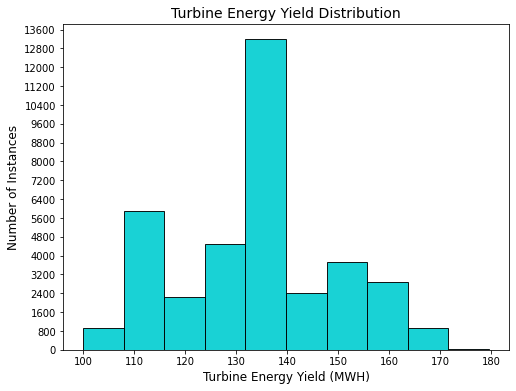

In [10]:
plt.figure(figsize=(8, 6))
plt.yticks(np.arange(0, 14200, 800))
plt.hist(x=df['TEY'], alpha=0.9, color='darkturquoise', edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Turbine Energy Yield Distribution', fontsize=14)
plt.show()

#### Turbine Energy Yield vs. Carbon Monoxide

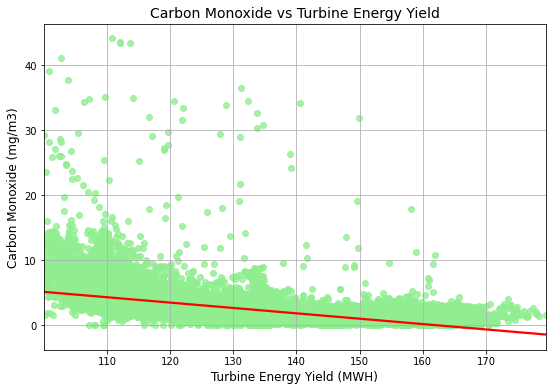

In [11]:
plt.figure(figsize=(9, 6))
sns.regplot(x=df['TEY'], y=df['CO'], order=1, 
            scatter_kws={"color": "lightgreen"}, line_kws={"color": "red"})
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Carbon Monoxide (mg/m3)', fontsize=12)
plt.title('Carbon Monoxide vs Turbine Energy Yield', fontsize=14)
plt.grid()
plt.show()

#### Compressor Discharge Pressure vs Turbine Energy Yield

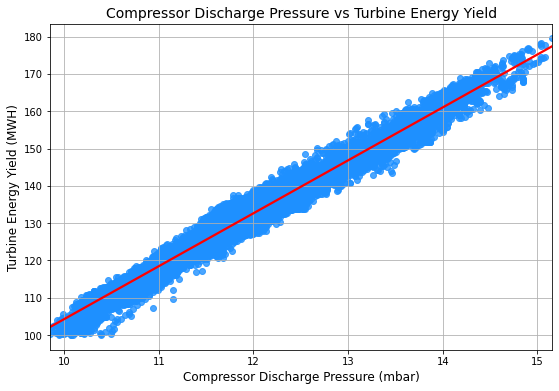

In [12]:
plt.figure(figsize=(9, 6))
sns.regplot(x=df['CDP'], y=df['TEY'], order=1, 
            scatter_kws={"color": "dodgerblue"}, line_kws={"color": "red"})
plt.xlabel('Compressor Discharge Pressure (mbar)', fontsize=12)
plt.ylabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.title('Compressor Discharge Pressure vs Turbine Energy Yield', fontsize=14)
plt.grid()
plt.show()

#### Pairwise Relationships between features

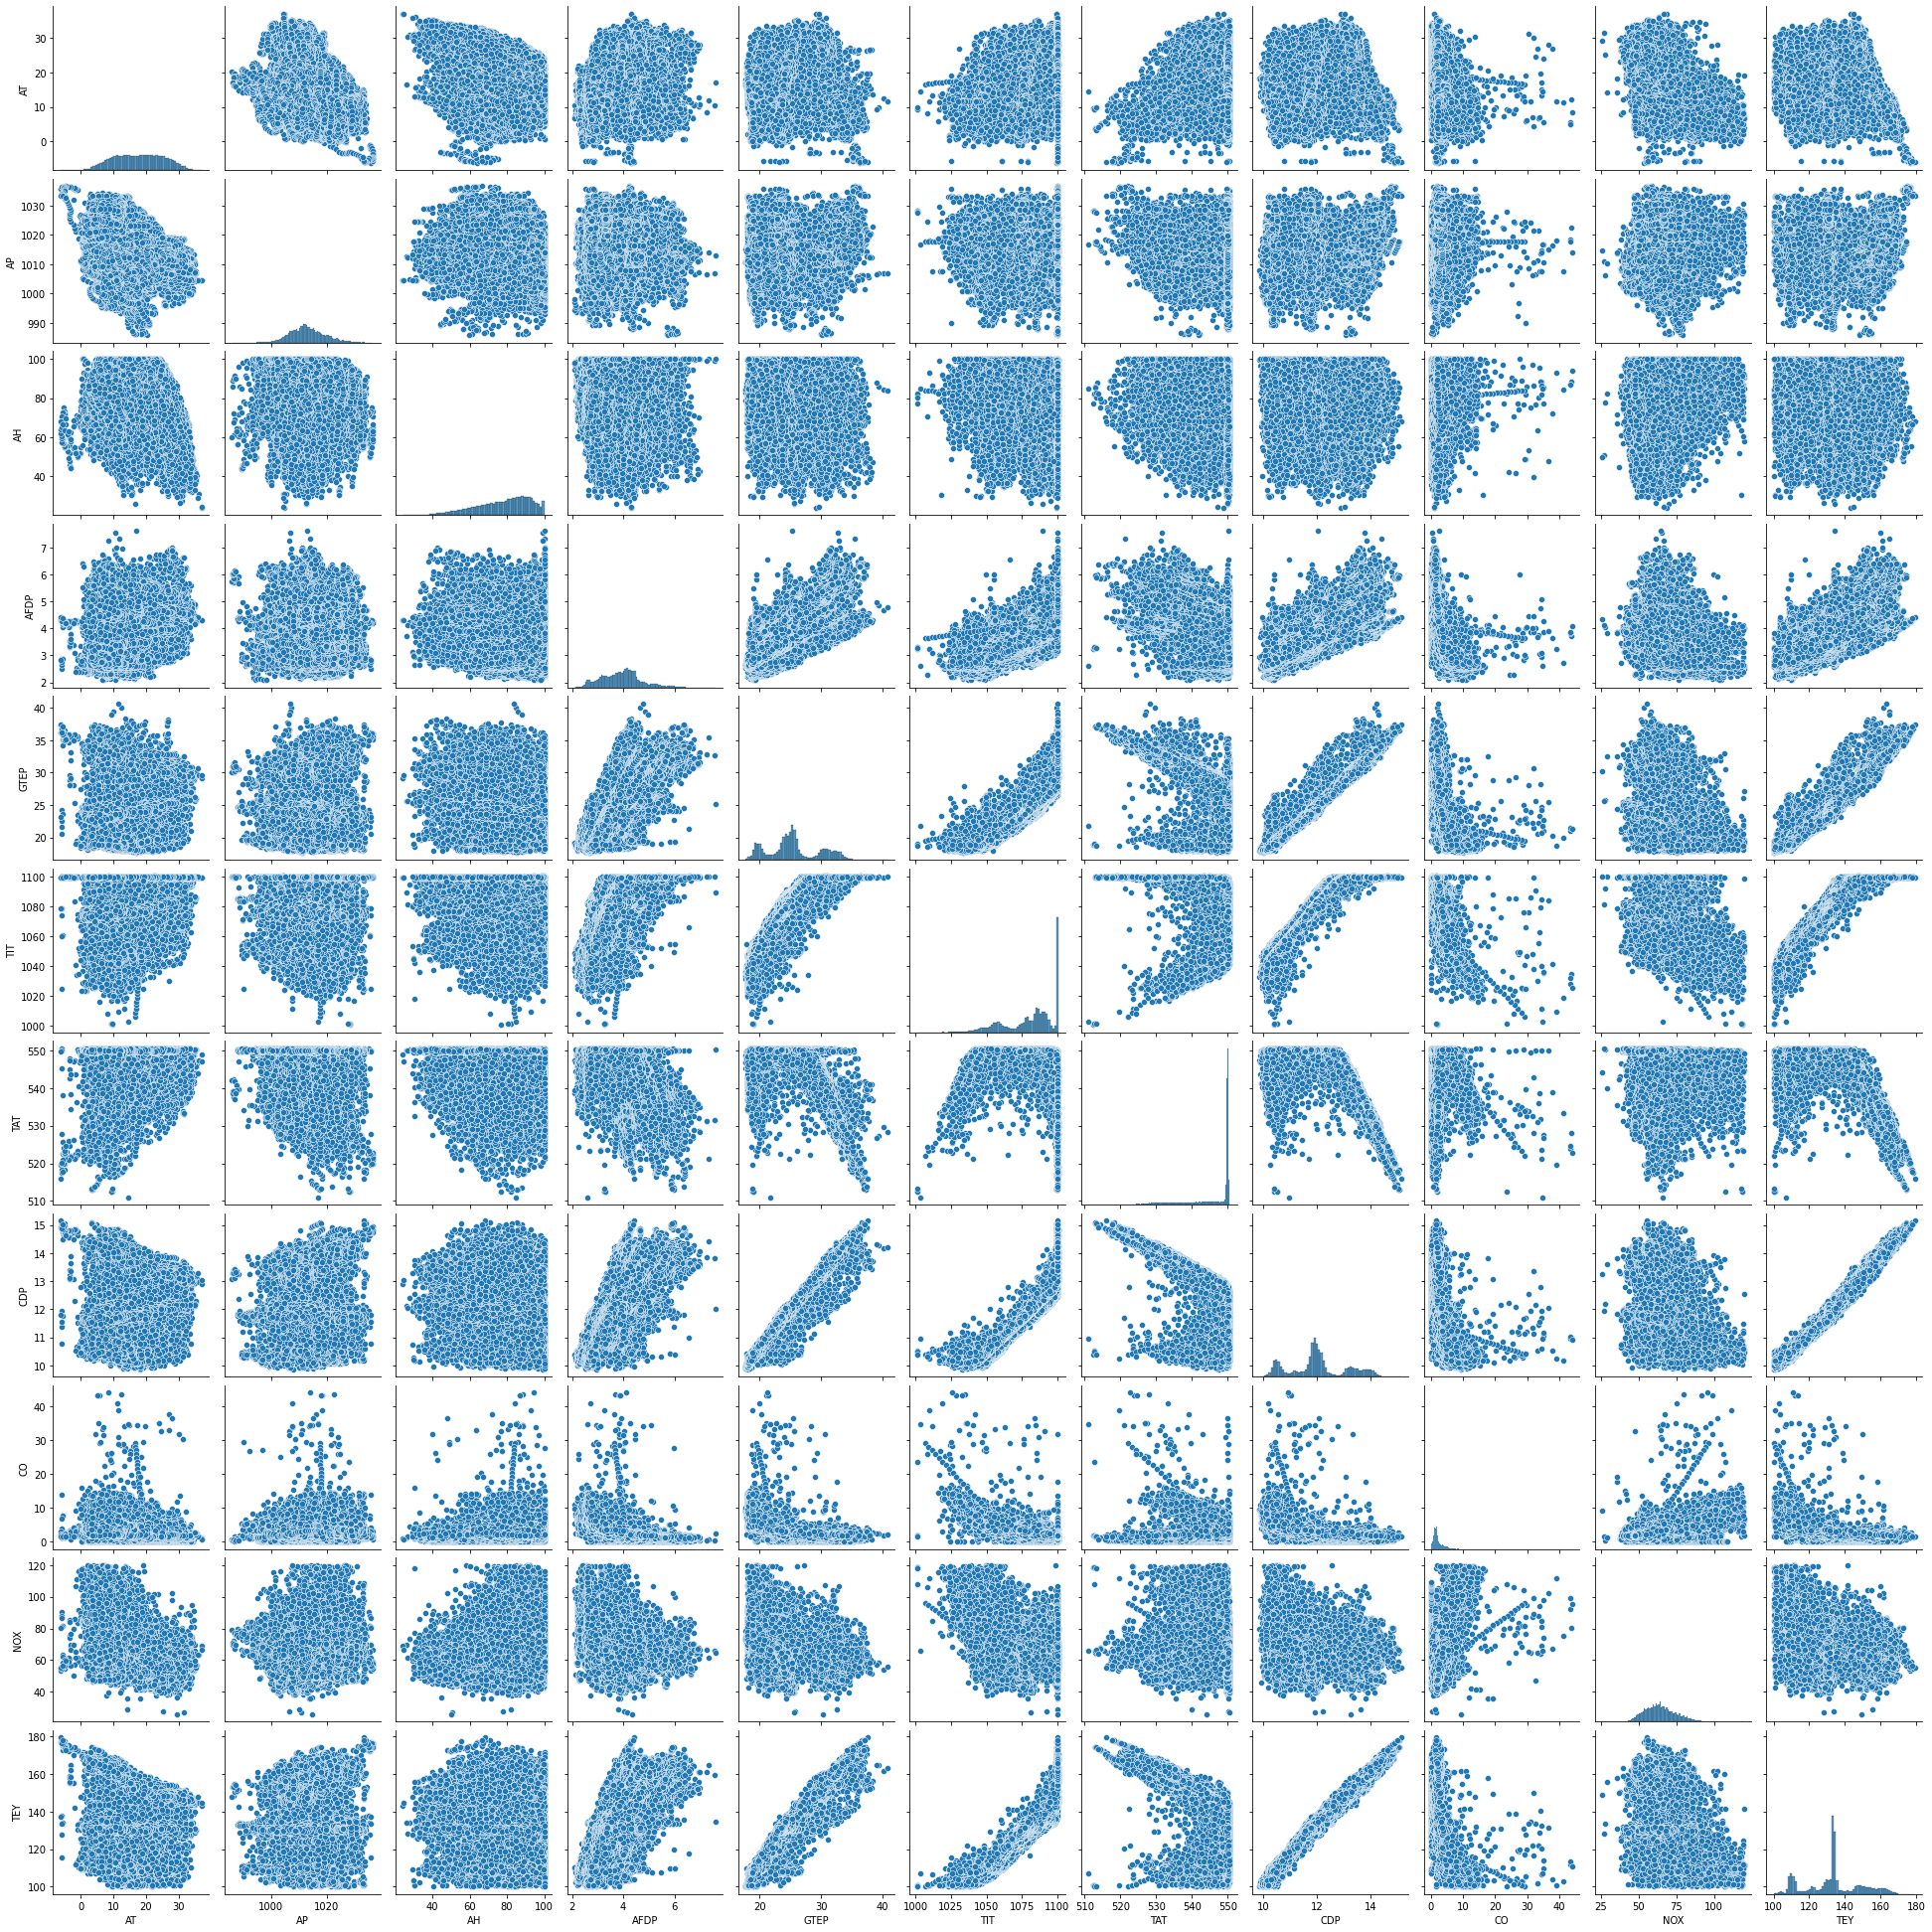

In [13]:
# Pairwise distributions
sns.pairplot(df)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

#### Correlation Map

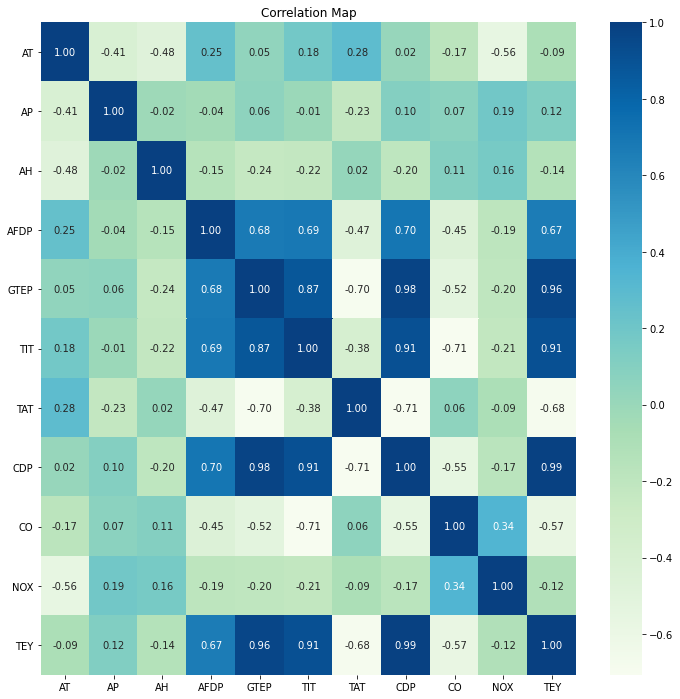

In [14]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='GnBu', annot=True, fmt = ".2f")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## 4. Data Preprocessing and Feature Engineering

### 4.1 Find the optimal number of clusters

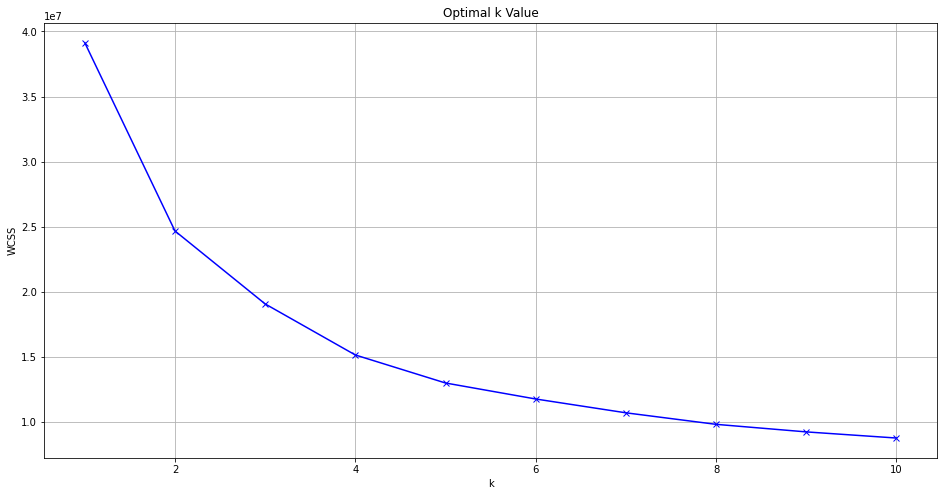

In [15]:
from sklearn.cluster import KMeans

# Using the "Elbow Method" - WCSS
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Optimal k Value')
plt.grid()
plt.show()

## 5. Define and Evalutate Models

### K-Means

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 3 3 ... 1 3 3]


In [17]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)

15159192.730794271
[[  25.46367893 1011.25277104   59.65523689    4.24752685   27.30999126
  1091.6351364   547.63739566   12.46192935    1.5979742    61.17790954
   137.76486594]
 [  16.54715299 1012.93747281   81.90591998    3.18673057   20.2473721
  1053.9806383   548.34737707   10.61109967    4.90928783   68.03349858
   111.9915922 ]
 [  13.82595885 1015.15988882   80.58474764    4.69650469   31.96548721
  1099.69841608  534.14057874   13.73868641    1.20948683   64.22207981
   157.20916844]
 [  15.34343632 1013.29798538   85.80416802    3.80560336   24.64710595
  1083.30837078  549.79216848   11.89296382    1.82545418   66.75150872
   132.73359966]]
9


## 6. Visualize Results

#### Ambient Temperature vs Turbine Energy Yield

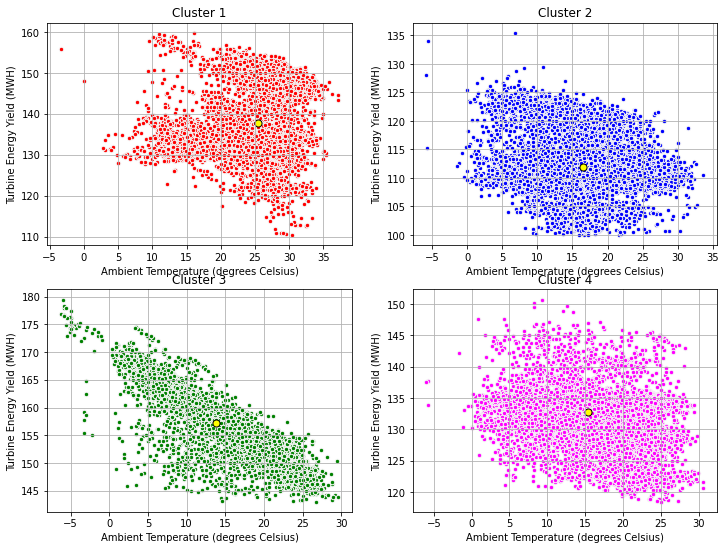

In [18]:
# Cluster 1
fig1 = plt.figure(figsize=(12, 9))
ax1 = fig1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 1')
plt.grid()

# Cluster 2
ax2 = fig1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 2')
plt.grid()

# Cluster 3
ax3 = fig1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 3')
plt.grid()

# Cluster 4
ax4 = fig1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[3, 0], kmeans.cluster_centers_[3, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 4')
plt.grid()

plt.show()

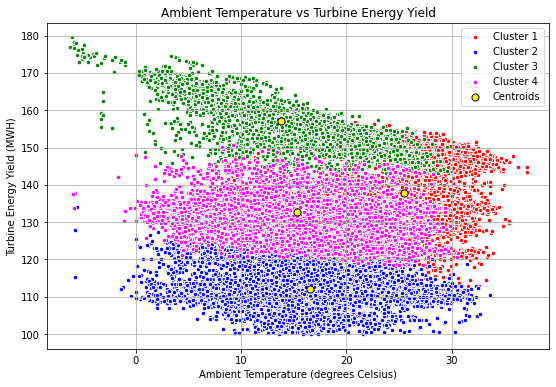

In [19]:
# Plot each cluster
plt.figure(figsize=(9, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Display plot
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Ambient Temperature vs Turbine Energy Yield')
plt.legend()
plt.grid()
plt.show()

#### Ambient Pressure vs Turbine Energy Yield

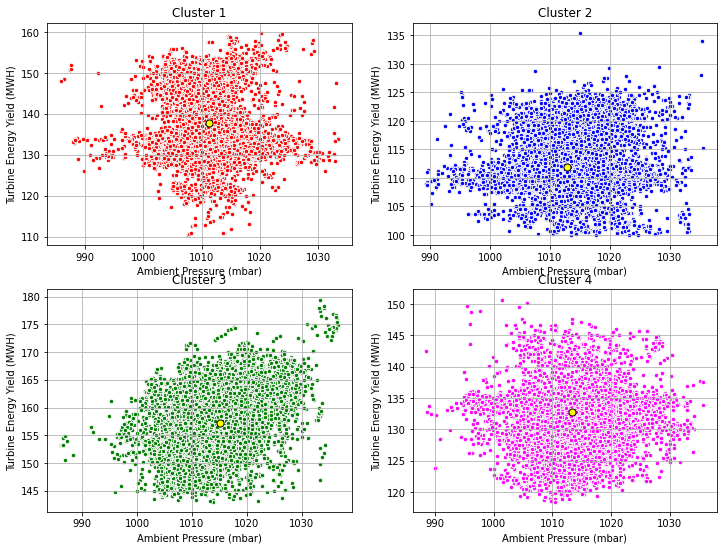

In [20]:
# Cluster 1
fig1 = plt.figure(figsize=(12, 9))
ax1 = fig1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[0, 1], kmeans.cluster_centers_[0, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 1')
plt.grid()

# Cluster 2
ax2 = fig1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[1, 1], kmeans.cluster_centers_[1, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 2')
plt.grid()

# Cluster 3
ax3 = fig1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[2, 1], kmeans.cluster_centers_[2, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 3')
plt.grid()

# Cluster 4
ax4 = fig1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[3, 1], kmeans.cluster_centers_[3, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 4')
plt.grid()

plt.show()

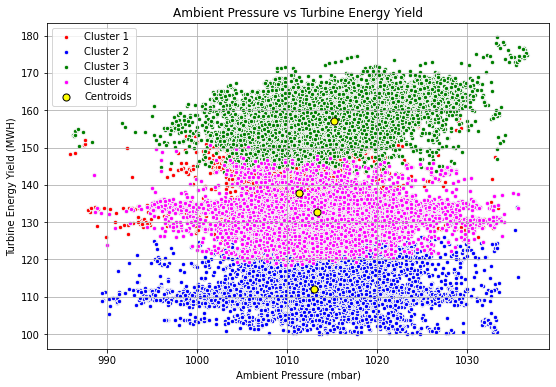

In [21]:
# Plot each cluster
plt.figure(figsize=(9, 6))
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Display plot
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Ambient Pressure vs Turbine Energy Yield')
plt.legend()
plt.grid()
plt.show()

#### Ambient Temperature vs Ambient Pressure

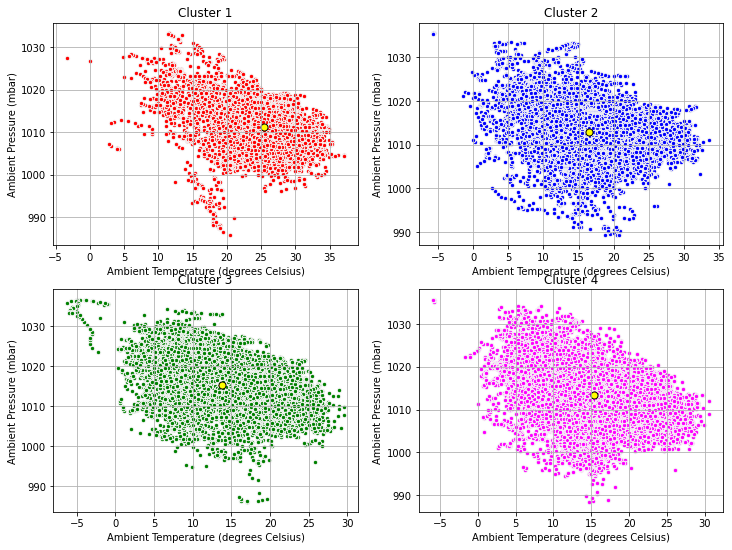

In [22]:
# Cluster 1
fig1 = plt.figure(figsize=(12, 9))
ax1 = fig1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Cluster 1')
plt.grid()

# Cluster 2
ax2 = fig1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Cluster 2')
plt.grid()

# Cluster 3
ax3 = fig1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Cluster 3')
plt.grid()

# Cluster 4
ax4 = fig1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[3, 0], kmeans.cluster_centers_[3, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Cluster 4')
plt.grid()

plt.show()

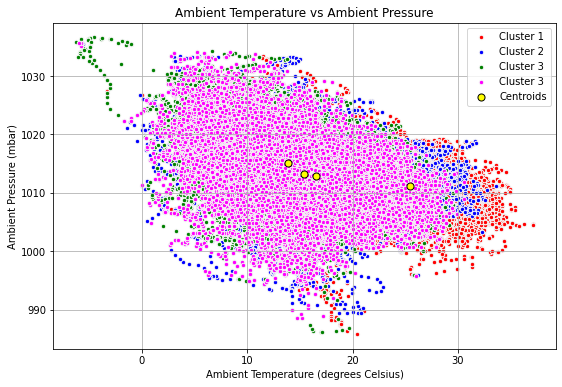

In [23]:
# Plot each cluster
plt.figure(figsize=(9, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=20, c='magenta', 
            label='Cluster 3', edgecolor='whitesmoke')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Display plot
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Ambient Temperature vs Ambient Pressure')
plt.legend()
plt.grid()
plt.show()

#### Ambient Humidity vs Turbine Energy Yield

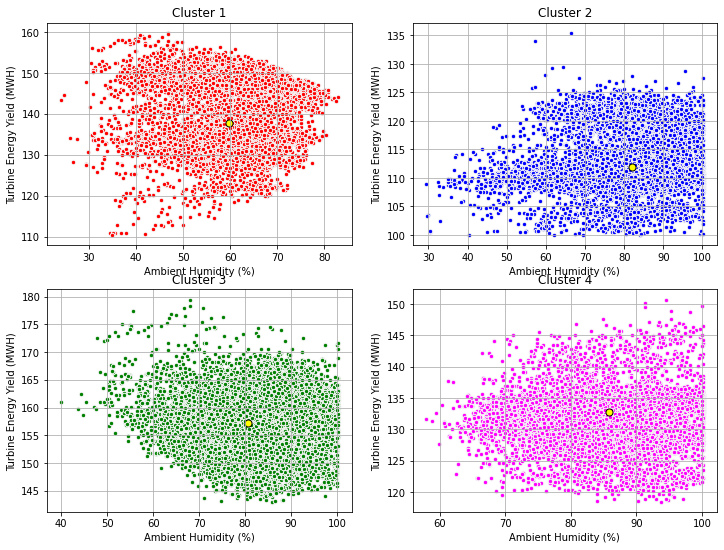

In [24]:
# Cluster 1
fig1 = plt.figure(figsize=(12, 9))
ax1 = fig1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[0, 2], kmeans.cluster_centers_[0, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 1')
plt.grid()

# Cluster 2
ax2 = fig1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[1, 2], kmeans.cluster_centers_[1, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 2')
plt.grid()

# Cluster 3
ax3 = fig1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[2, 2], kmeans.cluster_centers_[2, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 3')
plt.grid()

# Cluster 4
ax4 = fig1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[3, 2], kmeans.cluster_centers_[3, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 4')
plt.grid()

plt.show()

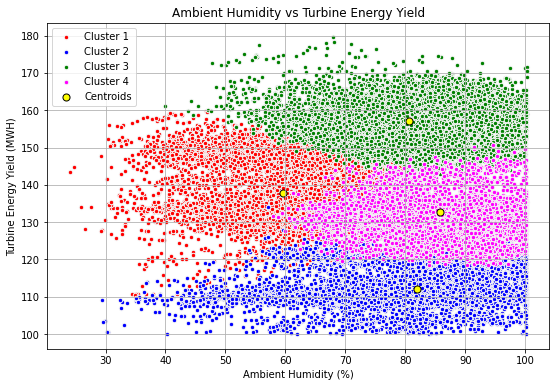

In [25]:
# Plot each cluster
plt.figure(figsize=(9, 6))
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Display plot
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Ambient Humidity vs Turbine Energy Yield')
plt.legend()
plt.grid()
plt.show()

#### Compressor Discharge Pressure vs Turbine Energy Yield

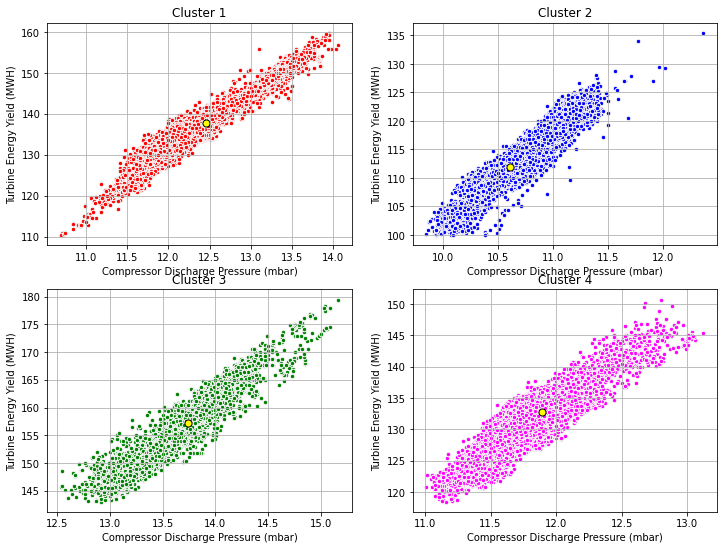

In [26]:
# Cluster 1
fig1 = plt.figure(figsize=(12, 9))
ax1 = fig1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 7], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[0, 7], kmeans.cluster_centers_[0, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 1')
plt.grid()

# Cluster 2
ax2 = fig1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 7], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[1, 7], kmeans.cluster_centers_[1, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 2')
plt.grid()

# Cluster 3
ax3 = fig1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 7], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[2, 7], kmeans.cluster_centers_[2, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 3')
plt.grid()

# Cluster 4
ax4 = fig1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 7], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[3, 7], kmeans.cluster_centers_[3, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 4')
plt.grid()

plt.show()

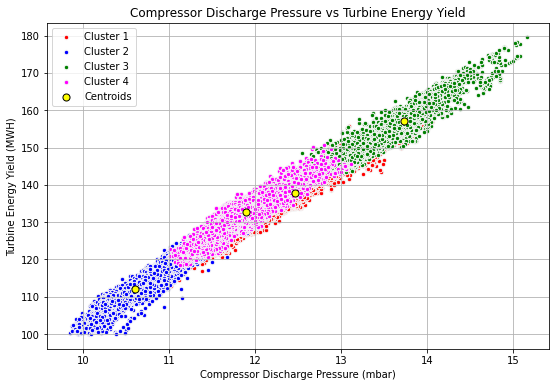

In [27]:
# Plot each cluster
plt.figure(figsize=(9, 6))
plt.scatter(X[y_kmeans == 0, 7], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 1, 7], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 2, 7], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 3, 7], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 7], kmeans.cluster_centers_[:, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Display plot
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Compressor Discharge Pressure vs Turbine Energy Yield')
plt.legend()
plt.grid()
plt.show()

#### Turbine Energy Yield vs Carbon Monoxide

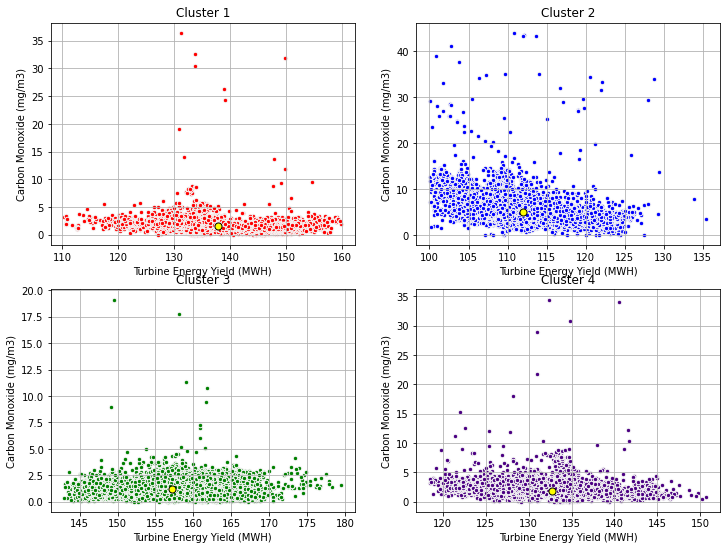

In [28]:
# Cluster 1
fig1 = plt.figure(figsize=(12, 9))
ax1 = fig1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, -1], X[y_kmeans == 0, 8], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[0, -1], kmeans.cluster_centers_[0, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Cluster 1')
plt.grid()

# Cluster 2
ax2 = fig1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, -1], X[y_kmeans == 1, 8], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[1, -1], kmeans.cluster_centers_[1, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Cluster 2')
plt.grid()

# Cluster 3
ax3 = fig1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, -1], X[y_kmeans == 2, 8], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[2, -1], kmeans.cluster_centers_[2, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Cluster 3')
plt.grid()

# Cluster 4
ax4 = fig1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, -1], X[y_kmeans == 3, 8], s=20, c='indigo', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[3, -1], kmeans.cluster_centers_[3, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Cluster 4')
plt.grid()

plt.show()

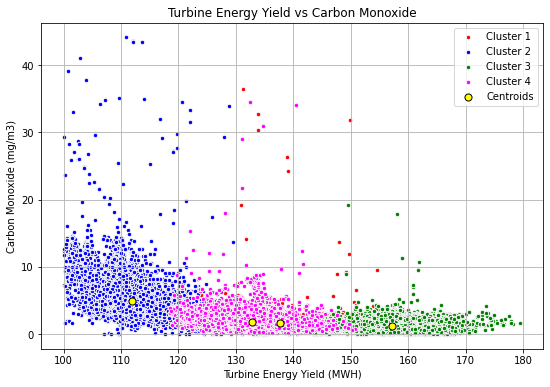

In [29]:
# Plot each cluster
plt.figure(figsize=(9, 6))
plt.scatter(X[y_kmeans == 0, -1], X[y_kmeans == 0, 8], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 1, -1], X[y_kmeans == 1, 8], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 2, -1], X[y_kmeans == 2, 8], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 3, -1], X[y_kmeans == 3, 8], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, -1], kmeans.cluster_centers_[:, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Display plot
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Turbine Energy Yield vs Carbon Monoxide')
plt.legend()
plt.grid()
plt.show()

#### Turbine Energy Yield vs Nitrogen Oxides

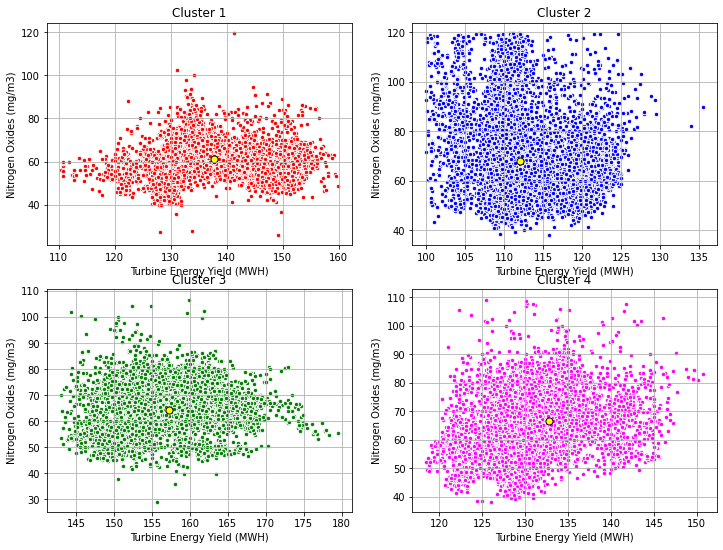

In [30]:
# Cluster 1
fig1 = plt.figure(figsize=(12, 9))
ax1 = fig1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, -1], X[y_kmeans == 0, 9], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[0, -1], kmeans.cluster_centers_[0, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Cluster 1')
plt.grid()

# Cluster 2
ax2 = fig1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, -1], X[y_kmeans == 1, 9], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[1, -1], kmeans.cluster_centers_[1, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Cluster 2')
plt.grid()

# Cluster 3
ax3 = fig1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, -1], X[y_kmeans == 2, 9], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[2, -1], kmeans.cluster_centers_[2, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Cluster 3')
plt.grid()

# Cluster 4
ax4 = fig1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, -1], X[y_kmeans == 3, 9], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
plt.scatter(kmeans.cluster_centers_[3, -1], kmeans.cluster_centers_[3, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Cluster 4')
plt.grid()

plt.show()

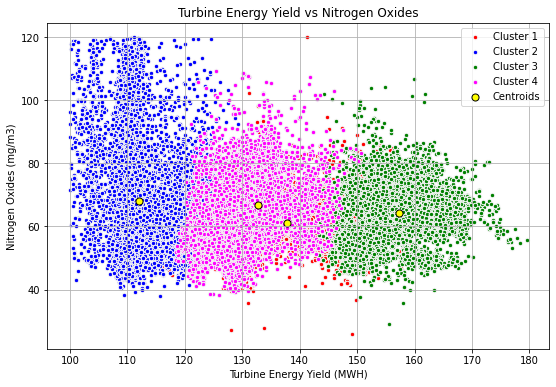

In [31]:
# Plot each cluster
plt.figure(figsize=(9, 6))
plt.scatter(X[y_kmeans == 0, -1], X[y_kmeans == 0, 9], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 1, -1], X[y_kmeans == 1, 9], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 2, -1], X[y_kmeans == 2, 9], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
plt.scatter(X[y_kmeans == 3, -1], X[y_kmeans == 3, 9], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, -1], kmeans.cluster_centers_[:, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Display plot
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Turbine Energy Yield vs Nitrogen Oxides')
plt.legend()
plt.grid()
plt.show()